# Create Dataset Meta Data File

**Author: Travyse Edwards**

In [1]:
import xlsxwriter
import pandas as pd

# Load Metadata File
originalMetadata = pd.read_excel('path/to/input')

# Create Excel File
metadata = xlsxwriter.Workbook('path/to/target')
study = metadata.add_worksheet('Study')
phenotype = metadata.add_worksheet('Phenotype')
info = metadata.add_worksheet('Sample and Experimental Info')
processing = metadata.add_worksheet('File and Data Processing Steps')
schema = metadata.add_worksheet('File Schema')

## Study Worksheet

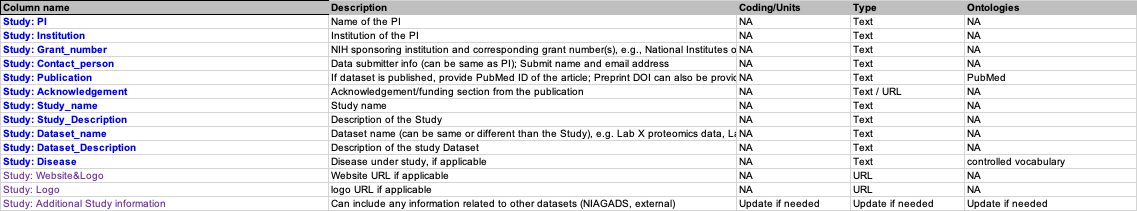

In [3]:
studyColumns = [
    'Study: PI',
    'Study: Institution',
    'Study: Grant_number',
    'Study: Contact_person',
    'Study: Publication',
    'Study: Acknowledgement',
    'Study: Study_name',
    'Study: Study_Description',
    'Study: Dataset_name',
    'Study: Dataset_Description',
    'Study: Disease',
    'Study: Website&Logo',
    'Study: Logo',
    'Study: Additional Study information'
]

for index, col in enumerate(studyColumns):
    study.write(0, index, col)

studyVals = [
    '',   # PI Name
    '',   # PI Intitution
    '',   # Grant Number
    '',   # Contact Person (Name, Email Address)
    '',   # PubMed ID of dataset publication
    '',   # Acknowledgement
    '',   # Study Name
    '',   # Study Description
    '',   # Dataset Name
    '',   # Dataset Description
    '',   # Disease
    'NA', # Website Logo
    'NA', # Logo
    'NA'  # Additional Study Information
]

for index, val in enumerate(studyVals):
    study.write(1, index, val)


## Phenotype Worksheet
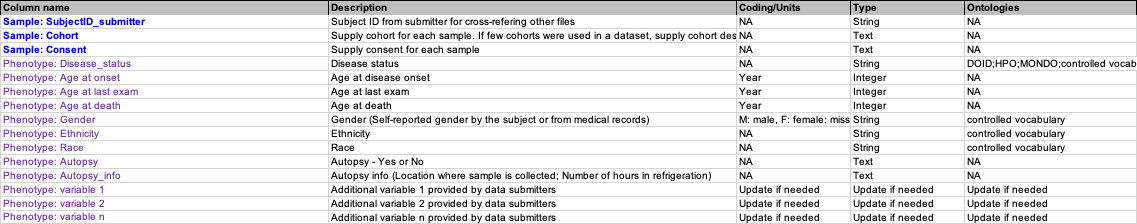

In [4]:
phenoColumns = [
    "Sample: SubjectID_submitter",
    "Sample: Cohort",
    "Sample: Consent",
    "Phenotype: Disease_status",
    "Phenotype: Age at onset",
    "Phenotype: Age at last exam",
    "Phenotype: Age at death",
    "Phenotype: Gender",
    "Phenotype: Ethnicity",
    "Phenotype: Race",
    "Phenotype: Autopsy",
    "Phenotype: Autopsy_info"
]

disease_status = {
    'CASE': 'Case (Patient w/ <Insert Disease>)',
    'CONTROL': 'Control (Patient w/o <Insert Disease>)'
} 

for index, col in enumerate(phenoColumns):
    phenotype.write(0, index, phenoColumns[index])

for index, pair in enumerate(originalMetadata.iterrows(), start=1):
    idx, row = pair
    phenoVals = ['NR' for x in range(len(phenoColumns))]
    phenoVals[0] =  # Subject ID from submitter
    phenoVals[1] =  # Supply cohort for each sample
    phenoVals[2] =  # Consent for each sample
    phenoVals[3] =  # Disease status
    phenoVals[4] =  # Age at disease onset
    phenoVals[5] =  # Age at last exam
    phenoVals[6] =  # Age at death
    phenoVals[7] =  # Gender (self-reported or from medical records)
    phenoVals[8] =  # Ethnicity
    phenoVals[9] =  # Race
    phenoVals[10] = # Autopsy
    phenoVals[11] = # Autopsy Info
    
    for num, col in enumerate(phenoColumns):
        phenotype.write(index, num, phenoVals[num])

## Sample and Experimental Info
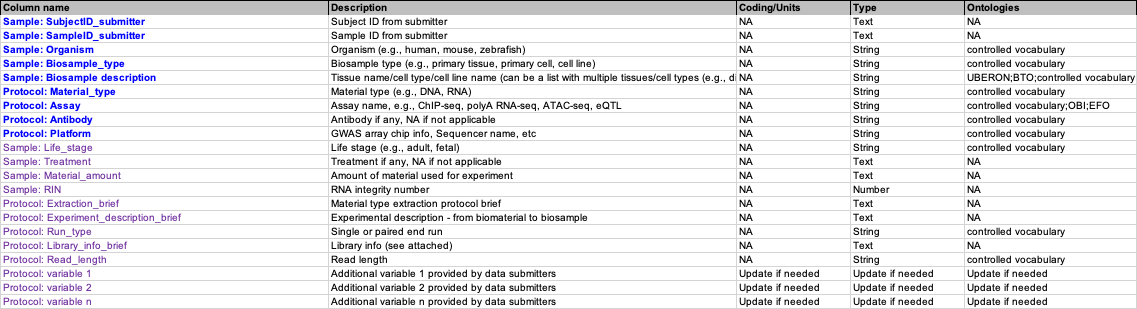

In [5]:
infoColumns = [
    "Sample: SubjectID_submitter",
    "Sample: SampleID_submitter",
    "Sample: Organism",
    "Sample: Biosample_type",
    "Sample: Biosample description",
    "Protocol: Material_type",
    "Protocol: Assay",
    "Protocol: Antibody",
    "Protocol: Platform",
    "Sample: Life_stage",
    "Sample: Treatment",
    "Sample: Material_amount",
    "Sample: RIN",
    "Protocol: Extraction_brief",
    "Protocol: Experiment_description_brief",
    "Protocol: Run_type",
    "Protocol: Library_info_brief",
    "Protocol: Read_length"
]

for index, col in enumerate(infoColumns):
    info.write(0, index, infoColumns[index])

for index, pair in enumerate(originalMetadata.iterrows(), start=1):
    idx, row = pair
    infoVals = ['NR' for x in range(len(infoColumns))]
    infoVals[0] =  # Subject ID
    infoVals[1] =  # Sample ID
    infoVals[2] =  # Organism
    infoVals[3] =  # Biosample Type
    infoVals[4] =  # Biosample Description
    infoVals[5] =  # Material Type
    infoVals[6] =  # Assay
    infoVals[7] =  # Antibody
    infoVals[8] =  # Platform
    infoVals[9] =  # Life Stage
    infoVals[10] = # Treatment
    infoVals[11] = # Material Amount
    infoVals[12] = # RIN
    infoVals[13] = # Extraction Brief
    infoVals[14] = # Experiment Description Brief. 
    infoVals[15] = # Run Type
    infoVals[16] = # Library Info Brief
    infoVals[17] = # Read Length

    for num, col in enumerate(infoColumns):
        info.write(index, num, infoVals[num])

## File and Data Processing Steps
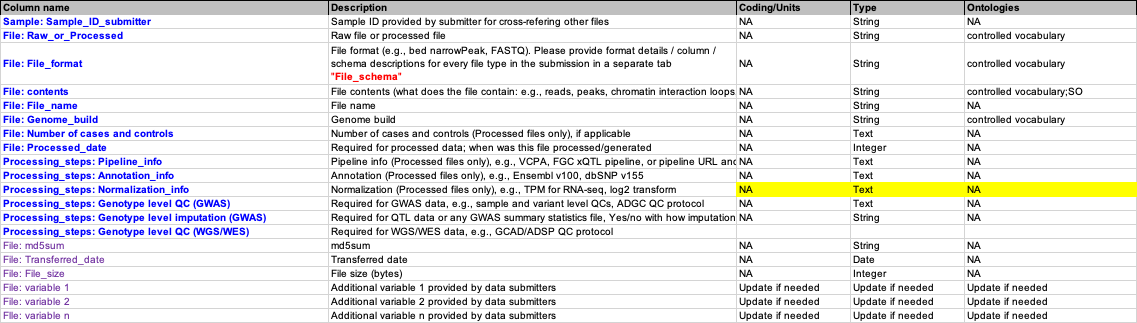

In [6]:
processingColumns = [
    "Sample: Sample_ID_submitter",
    "File: Raw_or_Processed",
    "File: File_format",
    "File: contents",
    "File: File_name",
    "File: Genome_build",
    "File: Number of cases and controls",
    "File: Processed_date",
    "Processing_steps:Pipeline_info",
    "Processing_steps:Annotation_info",
    "Processing_steps:Normalization_info",
    "Processing_steps: Genotype level QC (xQTL)",
    "Processing_steps: Genotype level imputation (xQTL)",
    "Processing_steps: Genotype level QC (WGS/WES)",
    "File: md5sum",
    "File: Transferred_date",
    "File: File_size"
]

for index, col in enumerate(processingColumns):
    processing.write(0, index, processingColumns[index])

for chrom in range(1,23):
    processingVals = ['NA' for x in range(len(processingColumns))]
    processingVals[0] = # Sample ID
    processingVals[1] = # Raw or Processed
    processingVals[2] = # File Format
    processingVals[3] = # File Contents
    processingVals[4] = # File Name
    processingVals[5] = # Genome Build
    processingVals[6] = # Number of Cases / Controls
    processingVals[7] = # Processed Date
    processingVals[8] = 'FGC xQTL pipeline' # Pipeline Info
    processingVals[9] = 'dbSNP v150' # Annotation Info
    processingVals[10] = 'TPM' # Normalization Info
    processingVals[11] = # Genotype Level QC carried out by xQTL Pipeline
    processingVals[12] = # Imputation
    processingVals[13] = # Genotype level QC (WGS/WES)
    processingVals[14] = # md5sum
    processingVals[15] = # Transferred Date
    processingVals[16] = # File Size
    
    for num, col in enumerate(processingColumns):
        processing.write(chrom, num, processingVals[num])

## File Schema

Example of how to write schema for file upload

In [7]:
schemaHeaderColumns = [
    "File Format",
    "Column Name",
    "Description"
]

for index, col in enumerate(schemaHeaderColumns):
    schema.write(0, index, schemaHeaderColumns[index])

fileSchemaPairs = {
    'chromosome': "GRCh38 chromosome name of the variant (e.g. 1,2,3 ...,X)",
    'position': "GRCh38 position of the variant",
    'variant': "The variant ID (chromosome_position_ref_alt) e.g. chr19_226776_C_T. Based on GRCh38 coordinates and reference genom",
    'ref': "GRCh38 reference allele",
    'alt': "GRCh38 alternative allele (also the effect allele)",
    'beta': "Regression coefficient from the linear model",
    'se': "Standard error of the beta",
    'pvalue': "Nominal p-value of association between the variant and the molecular trait",
    'TSS_D': "Distance of the SNP to the gene transcription start site (TSS)",
    'maf': "Minor allele frequency within a QTL mapping context (e.g. cell type or tissues within a study)",
    'n': "Total number of samples without missing data",
    'ma_samples': "Number of samples carrying the minor allele",
    'ac': "Count of the alternative allele",
    'molecular_trait_id': "ID of the molecular trait used for QTL mapping. Depending on the quantification method used, this can be either a gene id, exon id, transcript id or a txrevise promoter, splicing or 3'end event id. Examples: ENST00000356937, ENSG00000008128.",
    'molecular_trait_object_id': "For phenotypes with multiple correlated alternatives (multiple alternative transcripts or exons within a gene, multple alternative promoters in txrevise, multiple alternative intons in Leafcutter), this defines the level at which the phenotypes were aggregated. Permutation p-values are calculated across this set of alternatives",
}

schema.write(1, 0, "Processed TensorQTL Summary Statistics (txt file)")

for index, pair in enumerate(fileSchemaPairs.items(), start=1):
    key, val = pair
    schema.write(index, 1, key)
    schema.write(index, 2, val)


In [8]:
metadata.close()